# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** Ryan Andrew Lee
- **Email:** umbhilryan@gmail.com
- **ID Dicoding:** ryan_andrew_lee_kVdP

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1
> Dampak cuaca dan lingkungan terhadap jumlah penggunaan sepeda
> 1. Bagaimana cuaca memengaruhi jumlah peminjaman sepeda?
> 2. Musim apa yang memiliki tingkat peminjaman tertinggi dan terendah?
> 3. Bagaimana Pola jumlah peminjaman saat kondisi cuaca tertentu?  

- Pertanyaan 2
> 1. Kapan waktu paling sibuk untuk peminjaman sepeda?
> 2. Bagaimana perbedaan pola peminjaman antara hari kerja dan akhir pekan?


## Import Semua Packages/Library yang Digunakan

In [ ]:
from google.colab import files
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [ ]:
# 1. Mengunggah Data [hour.csv, day.csv] dari local ke google colab.
from google.colab import files
uploaded = files.upload()

Saving day.csv to day (1).csv
Saving hour.csv to hour (1).csv


In [ ]:
# 2. Memuat tabel day_df & memeriksa isi kepala tabel
day_df = pd.read_csv('/content/day.csv')
day_df.head()

In [ ]:
# 3. Memuat tabel hour_df & memeriksa isi kepala tabel
hour_df = pd.read_csv('/content/hour.csv')
hour_df.head()

**Insight:**
- 1.Yaitu setelah mendownload dataset yang diberikan maka tahap selanjut-nya yaitu mengupload  dataset tersebut ke google colab notebook
- 2.Setelah data set tersebut sudah masuk ke google colab, maka mulai melakukan proses Gathering Data dengan mendeklarasikan variable di python yang mengakses data set tersebut menggunakan libary pandas. serta mengecek apakah dataset tersebut sudah di load secara benar


### Assessing Data

**A. DAY_DF**


In [ ]:
# 1. Mengecek Informasi kolumn dataframe day_df
day_df.info()

In [ ]:
# 2. Mengecek apakah dataframe day_df memiliki nilai Nan(not a number), null,dan data duplikat
print(day_df.isna().sum())
print(day_df.isnull().sum())
print("Jumlah duplikasi: ", day_df.duplicated().sum())

In [ ]:
# 3. Mengecek apakah nilai column 'cnt' sesui dengan hasil kolumn 'casual' + 'registered'
print((day_df["cnt"] == day_df["casual"] + day_df["registered"]).all())

In [ ]:
# 4. Mengecek [min,max,mean,std] dalam dataframe
day_df.describe()

**B.HOUR_DF**

In [ ]:
# 1. Mengecek Informasi kolumn dataframe hour_df
hour_df.info()

In [ ]:
# 2. Mengecek apakah dataframe hour_df memiliki nilai Nan(not a number), null,dan data duplikat
print(hour_df.isna().sum())
print(hour_df.isnull().sum())
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

In [ ]:
# 3. Mengecek apakah nilai column 'cnt' sesui dengan hasil kolumn 'casual' + 'registered'
(hour_df["cnt"] == hour_df["casual"] + hour_df["registered"]).all()

In [ ]:
# 4. Mengecek [min,max,mean,std] dalam dataframe
hour_df.describe()

**C.VALIDASI DATA HOUR_DF & DAY_DF**

In [ ]:
# 1. Aggregating hour_df Data ke day_df
hour_aggregated = hour_df.groupby("dteday").agg({
    "cnt": "sum",
    "casual": "sum",
    "registered": "sum"
}).reset_index()

# 2. Validasi hour_df dengan day_df
comparison_df = day_df.merge(hour_aggregated, on="dteday", suffixes=("_day", "_hour"))
comparison_df["cnt_match"] = comparison_df["cnt_day"] == comparison_df["cnt_hour"]
comparison_df["casual_match"] = comparison_df["casual_day"] == comparison_df["casual_hour"]
comparison_df["registered_match"] = comparison_df["registered_day"] == comparison_df["registered_hour"]

# 3. Mengecek ketidakcocokan data day_df dengan hour_df pada bagian cnt, casual dan registered
print("Konsistensi di 'cnt' :", comparison_df["cnt_match"].value_counts())
print("Konsistensi di 'casual' :", comparison_df["casual_match"].value_counts())
print("Konsistensi di 'registered' :", comparison_df["registered_match"].value_counts())
print('Data Konsisten? : ',comparison_df[['cnt_match','casual_match','registered_match']].all().all())

Konsistensi di 'cnt' : cnt_match
True    731
Name: count, dtype: int64
Konsistensi di 'casual' : casual_match
True    731
Name: count, dtype: int64
Konsistensi di 'registered' : registered_match
True    731
Name: count, dtype: int64
Data Konsisten? :  True


**Insight:**
- Setelah melakukan penilain dataframe day_df dan hour_df diketahui tidak ada data null, Nan, duplikat dan nilai kolumn 'cnt' sesaui dengan hasil pertambahan kolumn 'casual' dan 'registered'
- Juga nilai total data cnt,casual dan registered dalam hour_df sesuai dengan day_df. artinya data tersebut konsisten dan tidak ada data yang tidak sesuai
- Tetapi perlu diketahui bahwa beberapa data yang telah di normalisasi menjadi nilai antar 0 - 1 perlu di denormalisais, kolumn dteday memiliki kesalahan tipe data, kolumn yang tidak berguna dan tidak memiliki relasi dengan dataset dan kolumn [season, month, weekday, weatherset, dan year] yang menggunakan angka sebagai kategori

### Cleaning Data

In [ ]:
# 1. Mengubah Tipedata kolumn di hour_df dan day_df menjadi dateTime
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

In [ ]:
# 2. Mengkonversi data 'temperature', 'atemp', 'humidity', dan WindSpeed.
for df in [day_df, hour_df]:
    df["temp"] = df["temp"] * 41
    df["atemp"] = df["atemp"] * 50
    df["hum"] = df["hum"] * 100
    df["windspeed"] = df["windspeed"] * 67

In [ ]:
# 3. Membuang Kolumn yang tidak terlalu berguna dan mengefek terhadap data
day_df.drop(columns=["instant"], inplace=True)
hour_df.drop(columns=["instant"], inplace=True)

In [ ]:
# 4. Mengubah data Angka menjadi Kategorial untuk readability
season_map = {1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"}
month_map = {1: "Jan", 2: "Feb", 3: "Mar", 4: "Apr", 5: "May", 6: "Jun",
             7: "Jul", 8: "Aug", 9: "Sep", 10: "Oct", 11: "Nov", 12: "Dec"}
weekday_map = {0: "Sunday", 1: "Monday", 2: "Tuesday", 3: "Wednesday",
               4: "Thursday", 5: "Friday", 6: "Saturday"}
weather_map = {1: "Clear", 2: "Mist", 3: "Light Snow/Rain", 4: "Heavy Rain/Snow"}
year_map = {0:"2011",1:"2012"}

for df in [day_df, hour_df]:
    df["season"] = df["season"].map(season_map)
    df["mnth"] = df["mnth"].map(month_map)
    df["weekday"] = df["weekday"].map(weekday_map)
    df["weathersit"] = df["weathersit"].map(weather_map)
    df['yr'] = df['yr'].map(year_map)

In [ ]:
# 5. Mengecek perubahan kolumn yang terjadi
hour_df.info()
day_df.info()

In [ ]:
# 6. Mengecek perubahan data yang terjadi
hour_df.head()
day_df.head()

**Insight:**
- 1. Memperbaiki tipedata kolumn 'dteday' di dataframe day_df dan hour_df menjadi date time
- 2. Mengkonversi data kolumn ['temperature', 'atemp', 'humidity', dan WindSpeed] dalam day_df dan hour_df
- 3. Membuang kolumn 'instant' pada hour_df dan day_df juga kolumn 'holiday' dan 'workingday' di hour_df karena day_df sudah menyimpan data tersebut
- 4. Mengubah data Angka menjadi Kategorial untuk readability dan kemudahan untuk visualisasi data di dalam dataframe day_df dan hour_df

## Exploratory Data Analysis (EDA)

### Explore ...

In [ ]:
day_df.describe(include="all")
hour_df.describe(include="all")

In [ ]:
# 1. Mendapatkan Data Pengguna berdasarkan Tahun dan Bulan
temp = day_df.groupby(['yr','mnth']).agg({
'cnt' : 'mean',
'casual' : 'mean',
'registered' : 'mean',
})

# Melihat bulan dan tahun apa yang melebihi dari rata rata keseluruhan
print("# ========= [ Melebihi Dari Rata Rata] ========= #")
print(temp[temp['cnt'] > temp['cnt'].mean()])
print("# ========= [ Kurang Dari Rata Rata] ========= #")
# Melihat bulan dan tahun apa yang kyrang dari rata rata keseluruhan
print(temp[temp['cnt'] < temp['cnt'].mean()])

In [ ]:
# 2. Mendapatkan Data Pengguna berdasarkan Bulan dan hari
temp = day_df.groupby(['mnth','weekday']).agg({
'cnt' : 'mean',
'casual' : 'mean',
'registered': 'mean',
'temp' : 'mean',
'atemp': 'mean',
'hum': 'mean'
})

# Melihat bulan dan hari apa yang melebihi dari rata rata keseluruhan
temp[temp['cnt'] > temp['cnt'].mean()]
# # Melihat bulan dan hari apa yang kyrang dari rata rata keseluruhan
temp[temp['cnt'] < temp['cnt'].mean()]

In [ ]:
# 3. Mendapatkan Data Pengguna berdasarkan Hari dan Jam
temp = hour_df.groupby(['weekday','hr']).agg({
'cnt' : 'mean',
'casual' : 'mean',
'registered': 'mean',
'temp' : 'mean',
'atemp': 'mean',
'hum': 'mean'
})

# Melihat hari dan jam apa yang melebihi dari rata rata keseluruhan
temp[temp['cnt'] > temp['cnt'].mean()]
# Melihat hari dan jam apa yang kyrang dari rata rata keseluruhan
temp[temp['cnt'] < temp['cnt'].mean()]

In [ ]:
# 4.MengExport hour_df menjadi data_df.csv
hour_df.to_csv('data_df.csv',index=False)

**Insight:**
- 1. Mendapatkan Data Pengguna Berdasarkan Bulan dan Tahun : Menunjukan bahwa tahun 2012 penggunaan sepeda meningkat dari 2011 secara rata rata terutama di bulan bulan terstentu
- 2. Mendapatkan Data Pengguna berdasarkan Bulan dan hari : Menunjukan bulan dan hari apa yang diatas dan dibawa rata rata serta rata rata kondisi temperatur, atem dan humadity pada saat hari itu
- 3. Mendapatkan Data Pengguna berdasarkan Hari dan Jam  : Menunjukan hari dan jam apa yang diatas dan di bawa rata rata serta rata rata kondisi temperatur, atem dan humadity pada saat jam tersebut itu
- 4. Karena Day_df hanya data total dari hour_df maka yang dipakai untuk dashboard streamlit adalah hour_df karena menunjukan data yang lebih detail

## Visualization & Explanatory Analysis

### Pertanyaan 1:

> 1. Bagaimana cuaca memengaruhi jumlah peminjaman sepeda?
> 2. Musim apa yang memiliki tingkat peminjaman tertinggi dan terendah?
> 3. Bagaimana Pola jumlah peminjaman saat kondisi cuaca tertentu?  

<ipython-input-53-d518fef1d9b5>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=weather_avg, x="weathersit", y="cnt", palette="viridis")


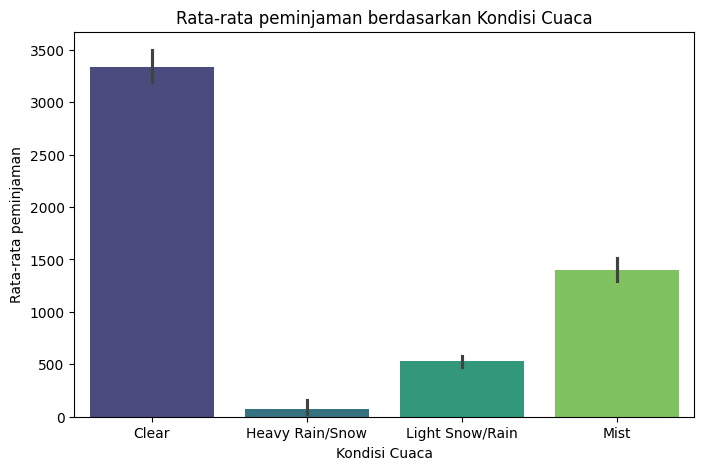

In [ ]:
# 1. Mendapatkan rata-rata pengguna berdasarkan kondisi cuaca
weather_avg = hour_df.groupby(["dteday", "weathersit"])["cnt"].sum().groupby(["weathersit",'dteday']).mean().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(data=weather_avg, x="weathersit", y="cnt", palette="viridis")
plt.xlabel("Kondisi Cuaca")
plt.ylabel("Rata-rata peminjaman")
plt.title("Rata-rata peminjaman berdasarkan Kondisi Cuaca")
plt.show()

<ipython-input-54-fb5ba55f67bd>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=season_avg, x="season", y="cnt", palette="coolwarm")


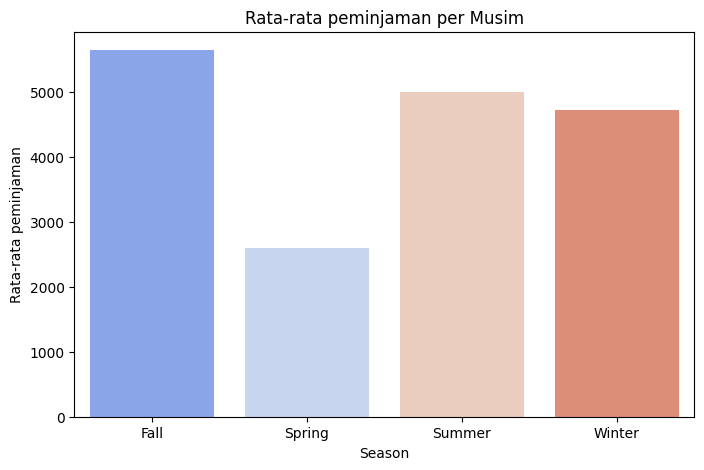

In [ ]:
# 2. Mendapatkan rata-rata pengguna berdasarkan musim
season_avg = day_df.groupby("season")["cnt"].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(data=season_avg, x="season", y="cnt", palette="coolwarm")
plt.xlabel("Season")
plt.ylabel("Rata-rata peminjaman")
plt.title("Rata-rata peminjaman per Musim")
plt.show()

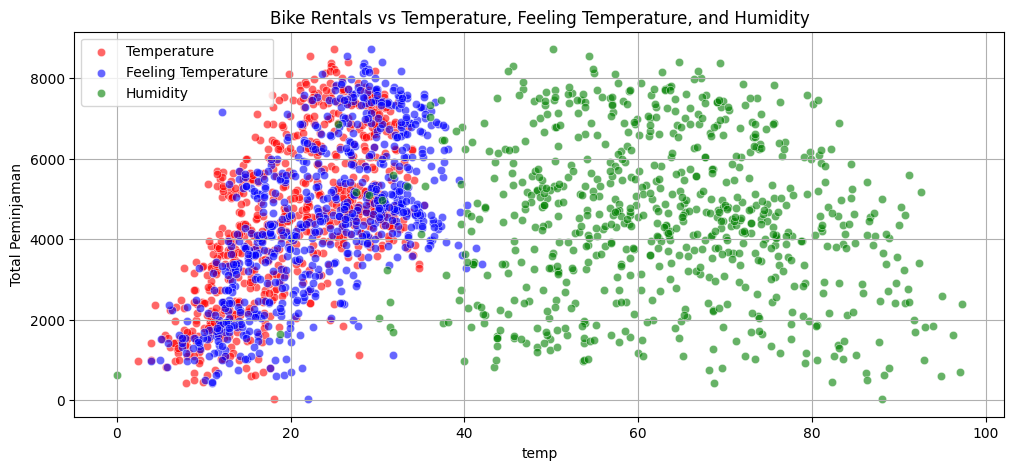

In [ ]:
# 3. Mendapatkan data rata-rata pengguna dalam kondisi temp,hum,dan atemp tertentu

plt.figure(figsize=(12, 5))
sns.scatterplot(data=day_df, x="temp", y="cnt", alpha=0.6, color='red', label="Temperature")
sns.scatterplot(data=day_df, x="atemp", y="cnt", alpha=0.6, color='blue', label="Feeling Temperature")
sns.scatterplot(data=day_df, x="hum", y="cnt", alpha=0.6, color='green', label="Humidity")
plt.ylabel("Total Peminjaman")
plt.title("Bike Rentals vs Temperature, Feeling Temperature, and Humidity")
plt.legend()
plt.grid()
plt.show()

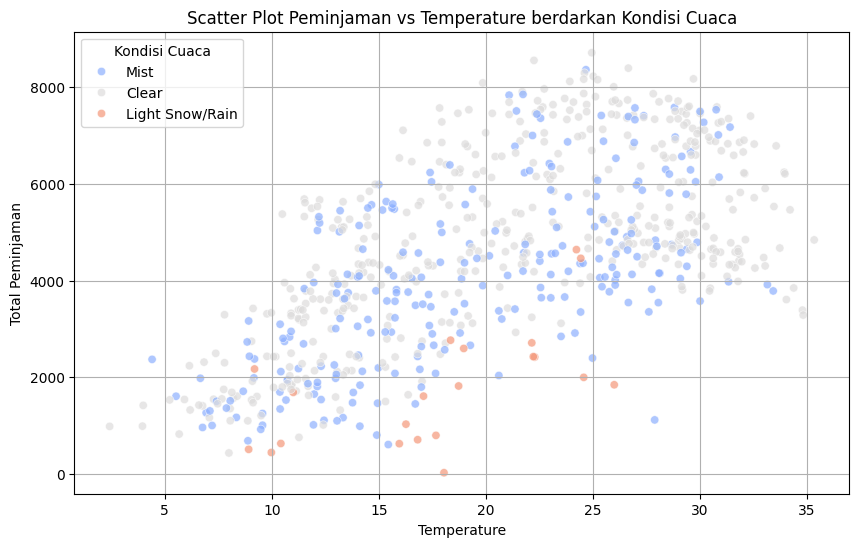

In [ ]:
# 4. Mendapatkan data hubungan cuaca, suhu, dan jumlah peminjaman
plt.figure(figsize=(10, 6))
sns.scatterplot(data=day_df, x="temp", y="cnt", hue="weathersit", palette="coolwarm", alpha=0.7)
plt.xlabel("Temperature")
plt.ylabel("Total Peminjaman")
plt.title("Scatter Plot Peminjaman vs Temperature berdarkan Kondisi Cuaca")
plt.legend(title="Kondisi Cuaca")
plt.grid()
plt.show()


<ipython-input-56-a787181d4667>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=day_df, x='season', y='cnt', palette='coolwarm')


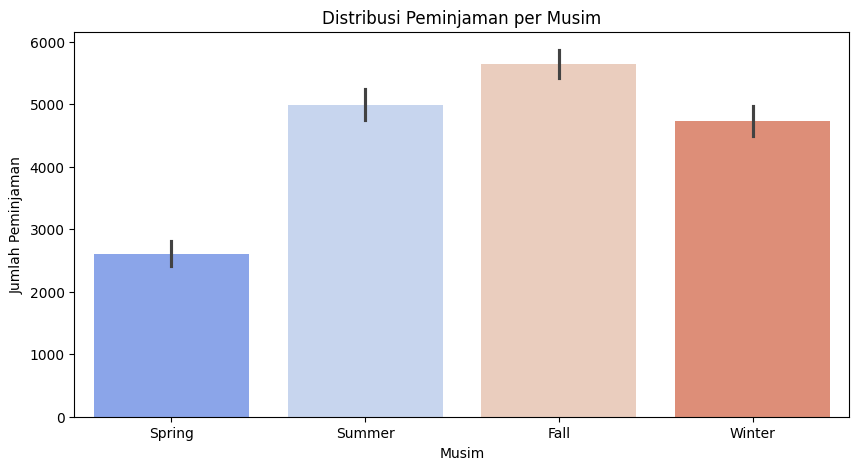

<ipython-input-56-a787181d4667>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=day_df, x='weathersit', y='cnt', palette='viridis')


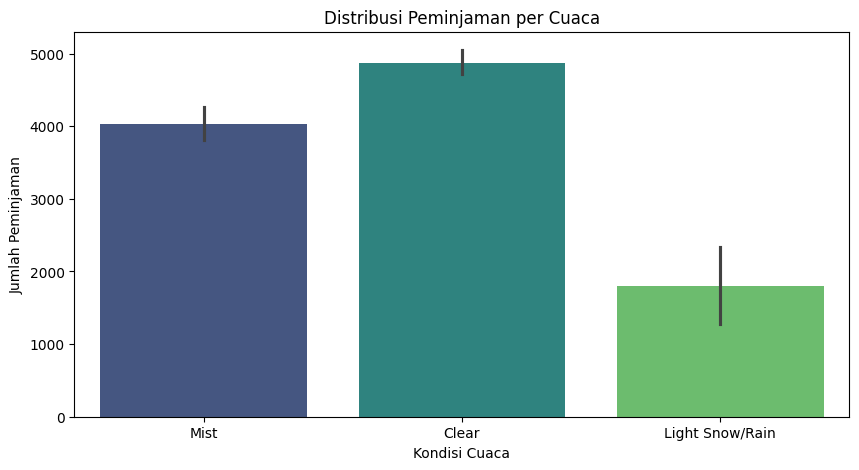

In [ ]:
# 5. Mendapatkan data perbandingan jumlah peminjaman berdasarkan Musim & Cuaca ---
plt.figure(figsize=(10, 5))
sns.barplot(data=day_df, x='season', y='cnt', palette='coolwarm')
plt.xlabel("Musim")
plt.ylabel("Jumlah Peminjaman")
plt.title("Distribusi Peminjaman per Musim")
plt.show()

plt.figure(figsize=(10, 5))
sns.barplot(data=day_df, x='weathersit', y='cnt', palette='viridis')
plt.xlabel("Kondisi Cuaca")
plt.ylabel("Jumlah Peminjaman")
plt.title("Distribusi Peminjaman per Cuaca")
plt.show()

### Pertanyaan 2:


> 1. Kapan jam paling sibuk untuk peminjaman sepeda?
> 2. Bagaimana perbedaan pola peminjaman antara hari kerja dan akhir pekan?

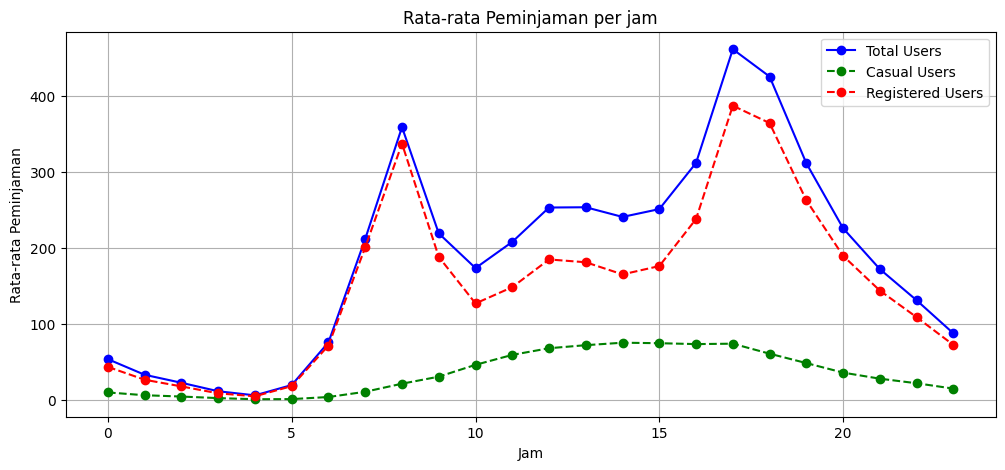

In [ ]:
# 1.Mendapatkan rata-rata pengguna dalam 1 hari dari total, casual, dan Registered
hour_avg = hour_df.groupby("hr")[["cnt", "casual", "registered"]].mean().reset_index()

plt.figure(figsize=(12, 5))
plt.plot(hour_avg["hr"], hour_avg["cnt"], marker='o', linestyle='-', label="Total Users", color="blue")
plt.plot(hour_avg["hr"], hour_avg["casual"], marker='o', linestyle='--', label="Casual Users", color="green")
plt.plot(hour_avg["hr"], hour_avg["registered"], marker='o', linestyle='--', label="Registered Users", color="red")
plt.xlabel("Jam")
plt.ylabel("Rata-rata Peminjaman")
plt.title("Rata-rata Peminjaman per jam")
plt.legend()
plt.grid()
plt.show()

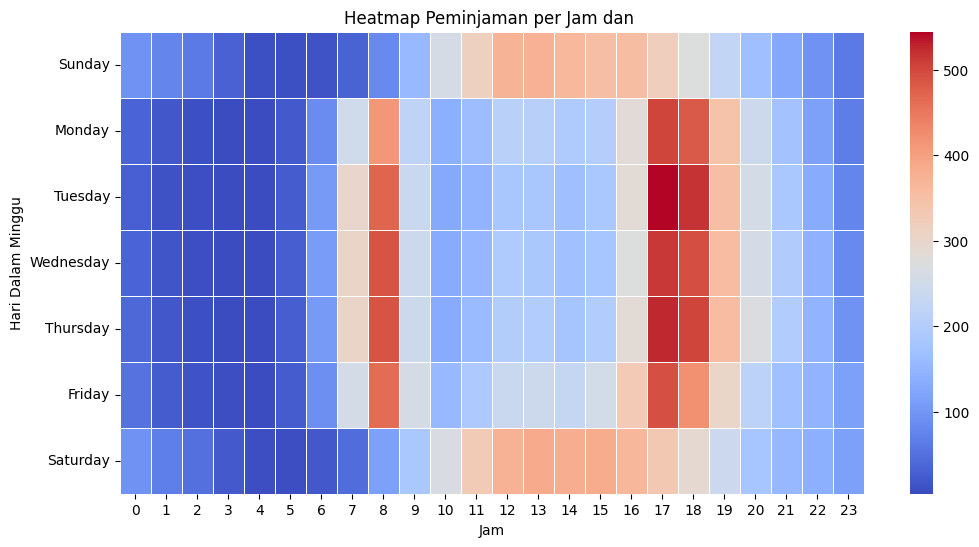

In [ ]:
# 2. Mendapatkan data rata-rata berdasarkan hari dalam seminggu
ordered_days = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]
hour_pivot = hour_df.pivot_table(index='weekday', columns='hr', values='cnt', aggfunc='mean').reindex(ordered_days)

plt.figure(figsize=(12, 6))
sns.heatmap(hour_pivot, cmap="coolwarm", annot=False, linewidths=0.5)
plt.xlabel("Jam")
plt.ylabel("Hari Dalam Minggu")
plt.title("Heatmap Peminjaman per Jam dan ")
plt.show()

<ipython-input-60-360b777174c5>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=weekend_avg, x="is_weekend", y="cnt", palette="mako")


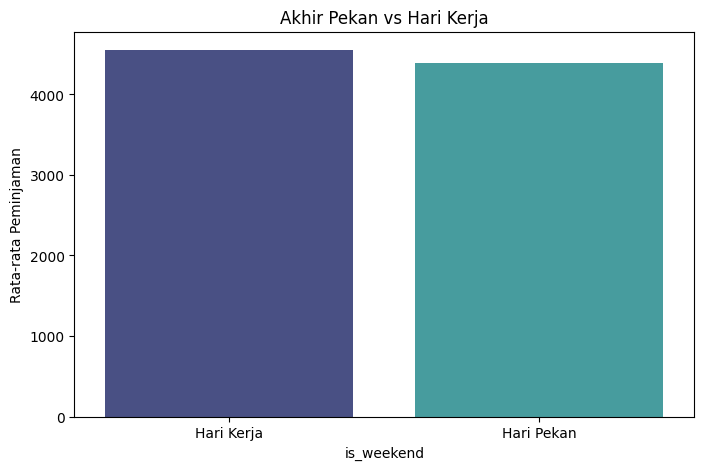

In [ ]:
# 3. Mendapatkan pola peminjaman antara hari kerja dan akhir pekan
day_df['is_weekend'] = day_df['weekday'].isin(['Saturday', 'Sunday'])
weekend_avg = day_df.groupby('is_weekend')["cnt"].mean().reset_index()
weekend_avg['is_weekend'] = weekend_avg['is_weekend'].map({False: "Hari Kerja", True: "Hari Pekan"})

plt.figure(figsize=(8, 5))
sns.barplot(data=weekend_avg, x="is_weekend", y="cnt", palette="mako")
plt.ylabel("Rata-rata Peminjaman")
plt.title("Akhir Pekan vs Hari Kerja")
plt.show()

**Insight:**
- 1. Dari hasil data rata-rata pengguna dalam 1 hari tersebut diketahui Penggunaan paling tinggi saat 07:00 - 0:800 dan 17:00 - 18:00

- 2. Penggunaan dari tertinggi sampai terkecil yaitu saat musim Gugur(1), musim Panas(2), musim Dingin(3) dan musim Semi(4)

- 3. Rata-rata penggunaan dalam kondisi cuaca yaitu paling tinggi saat cuaca cerah dan terendah saat kondisi bersalju atau hujan ringan

- 4. Dari data rata-rata pengguna dalam kondisi temp,hum,dan atemp. Menunjukan Suhu dan suhu yang dirasakan memiliki korelasi positif dengan jumlah peminjaman sepeda. Yang berarti semakin tinggi suhu, semakin banyak orang yang menyewa sepeda. sedangkan Kelembaban memiliki korelasi negatif dengan jumlah peminjaman artinya semakin tinggi kelembaban, semakin sedikit orang yang menyewa sepeda.

- 5. Dari Data Penggunaan Sepeda Berdasarkan Jam dan Hari menunjukan bahwa jam tersibuk yaitu dari hari senen - jumat saat jam 07:00 - 09:00 dan 17:00 - 19:00. sedangkan saat hari pekan puncak nya saat pukul 10:00 - 16:00

## Analisis Lanjutan (Opsional)

## Conclusion

# Conclution pertanyaan 1
Pertanyaan 1: Dampak Cuaca dan Lingkungan terhadap Jumlah Penggunaan Sepeda

- Bagaimana cuaca memengaruhi jumlah peminjaman sepeda?
> Kondisi cuaca yang lebih cerah memiliki jumlah peminjaman yang lebih tinggi dibandingkan dengan cuaca berawan atau hujan.
Saat cuaca berkabut atau mendung (mist), jumlah peminjaman masih cukup tinggi, tetapi menurun drastis saat terjadi hujan ringan atau salju.
Cuaca ekstrem (hujan deras atau salju lebat) memiliki jumlah peminjaman terendah.

- Musim apa yang memiliki tingkat peminjaman tertinggi dan terendah?
> Musim gugur (Fall) memiliki tingkat peminjaman tertinggi, diikuti oleh musim panas (Summer).
Musim semi (Spring) memiliki tingkat peminjaman terendah, kemungkinan karena curah hujan yang lebih tinggi.
Musim dingin (Winter) juga memiliki jumlah peminjaman yang lebih rendah dibandingkan musim panas dan gugur.

- Bagaimana pola jumlah peminjaman saat kondisi cuaca tertentu?
> Pada cuaca cerah, jumlah peminjaman meningkat di sepanjang hari dengan  puncaknya pada jam sibuk pagi dan sore.
Saat cuaca mendung atau berkabut, pola peminjaman tetap mengikuti pola harian normal tetapi dengan jumlah yang lebih sedikit.
Pada hari hujan atau salju, jumlah peminjaman cenderung lebih rendah sepanjang hari tanpa lonjakan yang signifikan.

# Conclution pertanyaan 2
Pertanyaan 2: Waktu dan Pola Peminjaman Sepeda

- Kapan waktu paling sibuk untuk peminjaman sepeda?
> Peminjaman tertinggi terjadi pada pagi hari (sekitar jam 7-9) dan sore hari (jam 17-19), yang bertepatan dengan jam berangkat dan pulang kerja. Dan
di luar jam sibuk, terutama setelah tengah malam hingga subuh, peminjaman sangat rendah.

- Bagaimana perbedaan pola peminjaman antara hari kerja dan akhir pekan?
> Hari kerja (Weekdays): Puncak peminjaman terjadi pada pagi dan sore hari, menunjukkan bahwa sepeda sering digunakan untuk perjalanan kerja atau aktivitas lain nya.
Dan akhir pekan (Weekend): Tidak ada lonjakan besar pada pagi atau sore hari, tetapi peminjaman meningkat secara merata sepanjang hari, yang mungkin mencerminkan penggunaan rekreasi.